In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('big_mart_train.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#new dataframe with only numeric data types
df_numeric = data.select_dtypes(include = ['float64', 'int64'])

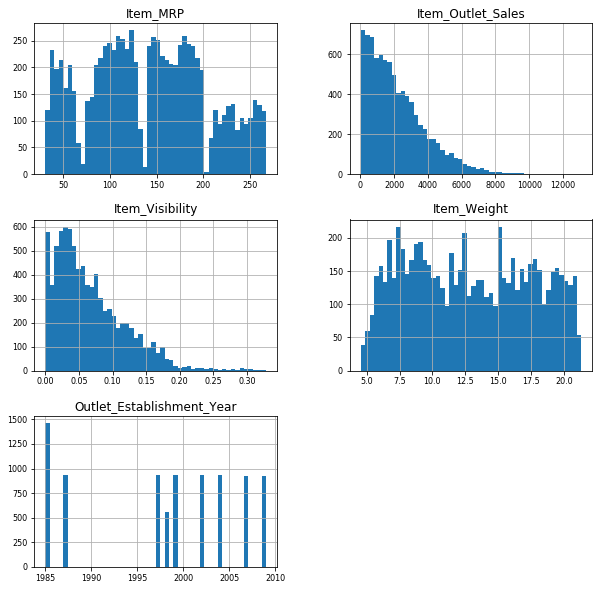

In [5]:
df_numeric.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
len(data['Item_Identifier'].unique())

1559

In [9]:
#limit to 10 to save space
data.groupby(by='Item_Identifier').mean()[:10]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600,0.031956,141.865400,2001.166667,1843.600200
DRA24,19.350,0.048062,164.086800,1995.000000,2246.218971
DRA59,8.270,0.134718,185.179900,1995.875000,2614.430150
DRB01,7.390,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115,0.008002,189.693000,1999.000000,2428.838400
DRB24,8.785,0.020624,154.465600,2003.000000,3050.695600
DRB25,12.300,0.077305,106.893800,1998.333333,1661.503900
DRB48,16.750,0.023700,39.253629,1996.714286,622.903457
DRC01,5.920,0.019219,48.969200,1997.833333,862.211000


In [10]:
# item weight max=mean would help impute missing values
data.groupby(by='Item_Identifier').max()[:10]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
DRA12,11.600,Low Fat,0.068535,Soft Drinks,143.0154,OUT045,2009,Tier 3,Supermarket Type2,3829.0158
DRA24,19.350,Regular,0.069909,Soft Drinks,165.7868,OUT049,2007,Tier 3,Supermarket Type3,4913.6040
DRA59,8.270,Regular,0.223985,Soft Drinks,186.6924,OUT049,2009,Tier 3,Supermarket Type3,7033.5112
DRB01,7.390,Low Fat,0.082367,Soft Drinks,190.9530,OUT049,1999,Tier 3,Supermarket Type3,2466.7890
DRB13,6.115,Regular,0.011791,Soft Drinks,191.1530,OUT049,2007,Tier 3,Supermarket Type1,3605.3070
DRB24,8.785,Low Fat,0.020694,Soft Drinks,156.4656,OUT049,2007,Tier 2,Supermarket Type1,4170.5712
DRB25,12.300,Low Fat,0.116261,Soft Drinks,107.9938,OUT035,2009,Tier 3,Supermarket Type3,2787.0388
DRB48,16.750,Regular,0.041600,Soft Drinks,40.9822,OUT049,2007,Tier 3,Supermarket Type3,1296.3126
DRC01,5.920,Regular,0.019309,Soft Drinks,50.3692,OUT046,2009,Tier 3,Supermarket Type3,1478.0760


In [11]:
# it appears the item_weight isn't duplicated
# this will serve as our "lookup" table
item_weights = data.iloc[:,0:2].groupby(by='Item_Identifier').max()

In [12]:
item_weights[:5]

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [13]:
# test number of values
len(item_weights)

1559

In [14]:
type(item_weights)

pandas.core.frame.DataFrame

In [15]:
#copy to work with temporarily
test = data

In [16]:
# adds the lookup column on the end...easy, but not pretty
test = test.merge(item_weights,on='Item_Identifier')

In [17]:
test = test.drop(columns=['Item_Weight_x'])

In [18]:
test.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.3
1,FDA15,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.3
2,FDA15,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.3
3,FDA15,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.3
4,FDA15,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.3


In [19]:
# rename the item_weight column.  
# other than being in the index that makes working with the label easy
# there shouldn't be any missing weight values
test.rename(columns={'Item_Weight_y': 'Item_Weight'}, inplace=True)

In [20]:
test.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.3
1,FDA15,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.3
2,FDA15,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.3
3,FDA15,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.3
4,FDA15,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.3


In [21]:
# why are there 4 missing values??
#FIXME
test['Item_Weight'].isnull().sum()

4